In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Data = pd.read_csv('Churn_Modelling.csv')
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
###Remove Unwanted Features
Churn = Data.copy()
Churn = Churn.drop(['RowNumber','CustomerId','Surname'],axis=1)
Churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Converting Categorical Features

In [5]:
Churn.dtypes[Churn.dtypes == object]

Geography    object
Gender       object
dtype: object

In [6]:
Churn['Geography'] = Churn['Geography'].astype('category').cat.codes
Churn['Gender'] = Churn['Gender'].astype('category').cat.codes

In [7]:
Churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df = Churn.copy()

In [9]:
from sklearn.preprocessing import minmax_scale, StandardScaler

In [33]:
clm = ((df.dtypes!="object")).index
clm

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
df = pd.DataFrame(minmax_scale(pd.DataFrame(df[clm]),axis=0),columns=clm)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


## Building a Naiive Bayes Model

In [22]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

def NBClassifer(X_train,X_test,y_train,y_test,thrshld=0.5):
    '''
    X_train, y_train are training data sets
    X_test, y_test are testing data sets
    '''
    
    
    NB_classifier = GaussianNB()
    NB_classifier.fit(X_train,y_train)
    logical = NB_classifier.predict_proba(X_test)[:,1]>thrshld
    pred = [0]*np.size(logical)
    for i in np.arange(0,np.size(logical)):
        if logical[i]==True:
            pred[i]=1
    cm = confusion_matrix(y_test,pred)
    print('\n Confusion Matrix: \n',cm)
    cr = classification_report(y_test,pred)
    print('\n classification report: \n ',cr)
    NB_roc_auc = roc_auc_score(y_test,pred)
    print('\n ROC Score: \n',NB_roc_auc)
    print('--'*50)

    fpr, tpr, thresholds = roc_curve(y_test,NB_classifier.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr ,label='NB classifier (area = %0.2f)' % NB_roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc='lower right')
    plt.grid()
    return 


 Confusion Matrix: 
 [[1542   35]
 [ 313  110]]

 classification report: 
                precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      1577
         1.0       0.76      0.26      0.39       423

    accuracy                           0.83      2000
   macro avg       0.79      0.62      0.64      2000
weighted avg       0.82      0.83      0.79      2000


 ROC Score: 
 0.6189266210043608
----------------------------------------------------------------------------------------------------


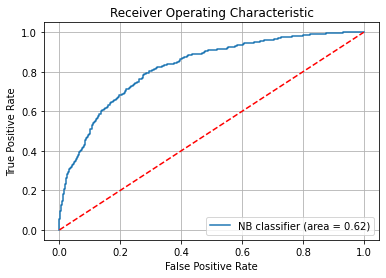

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=101)
NBClassifer(X_train, X_test, y_train, y_test,thrshld=0.5)

In [31]:
def NB_Kfold(df,target, k, thrshld=0.5):
    '''
    df : Data Frame
    target : target varible
    k =number of folds
    threshold = default 0.5
    '''
    X = df.drop(target,axis=1)
    y = df[target]
    
    if k==1:
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=101)
        NBClassifer(X_train, X_test, y_train, y_test,thrshld=thrshld)
    else:
        kf = KFold(n_splits=k,random_state=1,shuffle=True)
        for train,test in kf.split(df):
            X_train, X_test = X.iloc[train], X.iloc[test]
            y_train, y_test = y.iloc[train], y.iloc[test]
            NBClassifer(X_train, X_test, y_train, y_test,thrshld=thrshld)
         
    plt.show()
        
    return 


 Confusion Matrix: 
 [[1954   26]
 [ 405  115]]

 classification report: 
                precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      1980
         1.0       0.82      0.22      0.35       520

    accuracy                           0.83      2500
   macro avg       0.82      0.60      0.62      2500
weighted avg       0.83      0.83      0.79      2500


 ROC Score: 
 0.6040112665112666
----------------------------------------------------------------------------------------------------

 Confusion Matrix: 
 [[1963   31]
 [ 380  126]]

 classification report: 
                precision    recall  f1-score   support

         0.0       0.84      0.98      0.91      1994
         1.0       0.80      0.25      0.38       506

    accuracy                           0.84      2500
   macro avg       0.82      0.62      0.64      2500
weighted avg       0.83      0.84      0.80      2500


 ROC Score: 
 0.6167326088938753
-----------------------

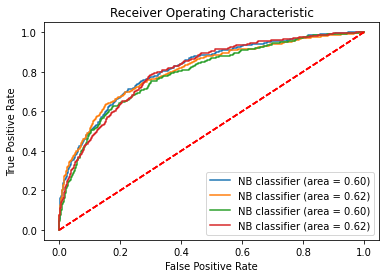

In [32]:
NB_Kfold(df=df,target='Exited',k=4,thrshld=0.5)